<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Week%203/Google%20Colab/Tugas_Week_3_SVHN_Tensorflow_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle

from scipy.io import loadmat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
# Load
train_data = loadmat('train_32x32.mat')
test_data = loadmat('test_32x32.mat')

# Extract
X_train = np.transpose(train_data['X'], (3, 0, 1, 2))
y_train = train_data['y'].flatten()

X_test = np.transpose(test_data['X'], (3, 0, 1, 2))
y_test = test_data['y'].flatten()

# Label 10 di SVHN adalah digit 0, jadi kita ubah:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Data Exploring

In [ ]:
print("Training Images Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Images Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)

Training Images Shape: (73257, 32, 32, 3)
Training Labels Shape: (73257,)
Test Images Shape: (26032, 32, 32, 3)
Test Labels Shape: (26032,)


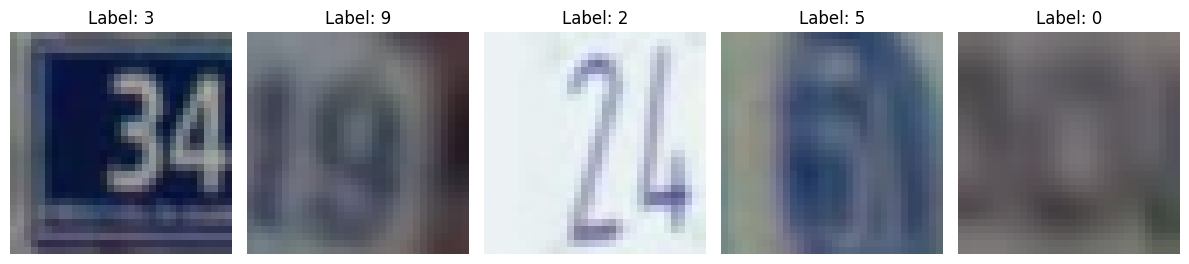

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    idx = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[idx])
    axes[i].set_title(f"Label: {y_train[idx]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
X_train

array([[[[0.12941177, 0.11764706, 0.14901961],
         [0.05882353, 0.09019608, 0.07450981],
         [0.05882353, 0.06666667, 0.07450981],
         ...,
         [0.28235295, 0.25490198, 0.21960784],
         [0.32156864, 0.3019608 , 0.22352941],
         [0.34901962, 0.30980393, 0.23137255]],

        [[0.10980392, 0.15294118, 0.13725491],
         [0.05490196, 0.09803922, 0.08627451],
         [0.05490196, 0.07843138, 0.06666667],
         ...,
         [0.15686275, 0.15294118, 0.19607843],
         [0.2627451 , 0.22745098, 0.20392157],
         [0.3254902 , 0.30588236, 0.23529412]],

        [[0.15686275, 0.16078432, 0.14901961],
         [0.07058824, 0.08235294, 0.10196079],
         [0.0627451 , 0.06666667, 0.09019608],
         ...,
         [0.09019608, 0.11372549, 0.1764706 ],
         [0.13725491, 0.16470589, 0.17254902],
         [0.28235295, 0.27058825, 0.20784314]],

        ...,

        [[0.3372549 , 0.31764707, 0.29411766],
         [0.34117648, 0.32156864, 0.2784314 ]

# CNN Model

In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model_cnn.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 159s 170ms/step - accuracy: 0.4313 - loss: 1.6331 - val_accuracy: 0.8436 - val_loss: 0.5233
Epoch 2/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 195s 163ms/step - accuracy: 0.8363 - loss: 0.5473 - val_accuracy: 0.8715 - val_loss: 0.4317
Epoch 3/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 146s 159ms/step - accuracy: 0.8686 - loss: 0.4359 - val_accuracy: 0.8916 - val_loss: 0.3654
Epoch 4/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 206s 163ms/step - accuracy: 0.8862 - loss: 0.3794 - val_accuracy: 0.8920 - val_loss: 0.3601
Epoch 5/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 203s 164ms/step - accuracy: 0.8978 - loss: 0.3446 - val_accuracy: 0.9037 - val_loss: 0.3294
Epoch 6/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 199s 161ms/step - accuracy: 0.9077 - loss: 0.3159 - val_accuracy: 0.8993 - val_loss: 0.3448
Epoch 7/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 207s 166ms/step - accuracy: 0.9141 - loss: 0.2887 - val_accuracy: 0.9102 - val_loss: 0.3228
Epoch 8/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 152s 166ms/step - accuracy: 0.9199 -

In [ ]:
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.3494
Test Accuracy: 0.9014


In [ ]:
y_pred_probs = model_cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step


In [ ]:
len(y_pred)

26032

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1574   22   14   10    6    5   60    4   16   33]
 [  31 4816   38   52   59   11   21   47   18    6]
 [   9   34 3885  105   30   11    9   33   12   21]
 [  10   38   61 2569    6   50   27   11   48   62]
 [  12   89   31   43 2279   12   29    8    6   14]
 [   9   17   20  100    8 2094  106    5    8   17]
 [  37   24   10   22   18   52 1776    4   24   10]
 [   4   97   48   24    7    7    4 1816    3    9]
 [  27   16   18   71   14   27  151    1 1281   54]
 [  53   14   71   31    6   12    9    6   18 1375]]



Accuracy: 0.9014
Precision: 0.9026
Recall: 0.9014
F1 Score: 0.9013
ROC AUC Score: 0.9915


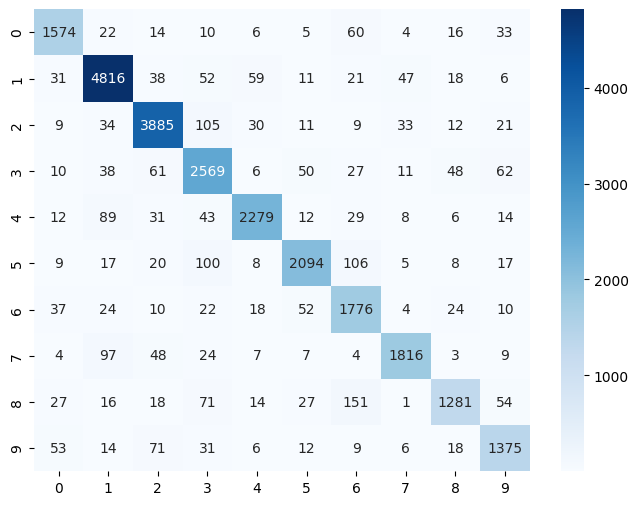

In [ ]:
cnn_acc = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred, average='weighted')
cnn_recall = recall_score(y_test, y_pred, average='weighted')
cnn_f1 = f1_score(y_test, y_pred, average='weighted')
cnn_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

# Visualisasi dengan Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

print(f"\nAccuracy: {cnn_acc:.4f}\nPrecision: {cnn_precision:.4f}\nRecall: {cnn_recall:.4f}\nF1 Score: {cnn_f1:.4f}\nROC AUC Score: {cnn_roc_auc:.4f}")


Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


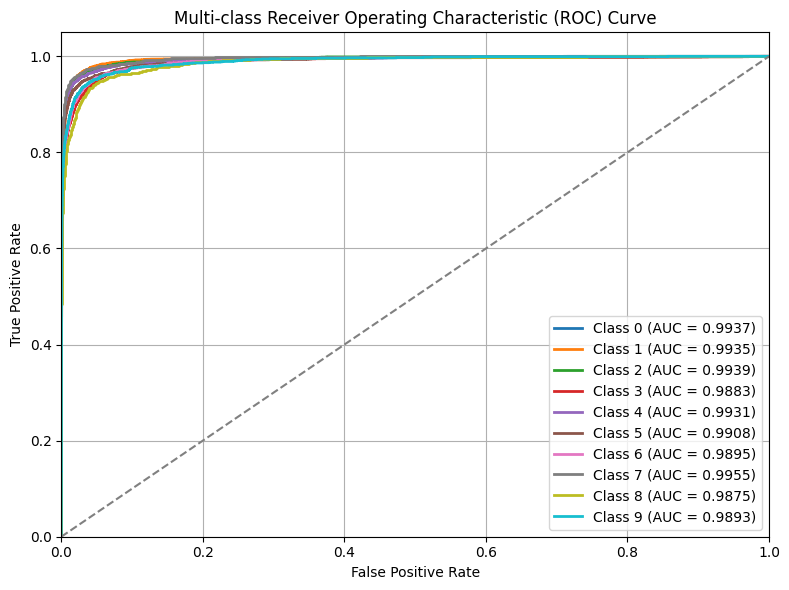

In [ ]:
# Cek apakah probabilitas sudah benar
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek apakah jumlah kelas sesuai
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi ke One-vs-Rest
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(8, 6))

# Plot ROC untuk tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Garis referensi diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling dan layout
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis CNN Model

## 📊 Evaluasi Model CNN Tensorflow

### 🔢 Confusion Matrix
Confusion matrix menunjukkan distribusi prediksi benar dan salah dari model klasifikasi terhadap setiap kelas (0–9). Baris = label sebenarnya, kolom = prediksi model.

### 📈 Metrik Evaluasi
Berikut hasil evaluasi model:

- **Accuracy**: 0.9014
  $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Seluruh Data}}$$

- **Precision**: 0.9026
  $$\text{Precision} = \frac{TP}{TP + FP}$$
  Precision mengukur seberapa akurat model ketika memprediksi sebuah kelas (menghindari false positives).

- **Recall**: 0.9014
  $$\text{Recall} = \frac{TP}{TP + FN}$$
  Recall mengukur seberapa baik model dalam menemukan semua contoh yang benar (menghindari false negatives).

- **F1 Score**: 0.9013
  $$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
  Kombinasi harmonis antara precision dan recall.

- **ROC AUC Score**: 0.9915
  ROC AUC menunjukkan performa model dalam membedakan kelas secara keseluruhan. Nilai dekat 1 berarti sangat baik.

### ✅ Kesimpulan
Model ini memiliki performa cukup baik dengan **akurasi sekitar 90.1%** dan **AUC Score sangat tinggi** (0.9915) menandakan model mampu membedakan antar kelas dengan baik. F1 score juga cukup tinggi, menandakan keseimbangan antara precision dan recall.

Namun, masih ada beberapa kelas yang memiliki nilai prediksi silang cukup tinggi (misclassifications), terutama antara kelas 1, 8, dan 9.

# MLP Model

In [ ]:
model_mlp = Sequential([
    Flatten(input_shape=(32, 32, 3)),       # Meratakan input gambar 32x32x3 jadi vektor 3072
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')         # Output 10 kelas
])

model_mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model_mlp.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.1756 - loss: 2.3299 - val_accuracy: 0.1875 - val_loss: 2.2351
Epoch 2/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.1891 - loss: 2.2338 - val_accuracy: 0.1875 - val_loss: 2.2370
Epoch 3/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.1894 - loss: 2.2386 - val_accuracy: 0.1875 - val_loss: 2.2371
Epoch 4/30
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.1895 - loss: 2.2371 - val_accuracy: 0.1875 - val_loss: 2.2370


In [ ]:
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 2.2196
Test Accuracy: 0.1959


In [ ]:
y_pred_probs = model_mlp.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_mlp)

Confusion Matrix:
[[   0 1744    0    0    0    0    0    0    0    0]
 [   0 5099    0    0    0    0    0    0    0    0]
 [   0 4149    0    0    0    0    0    0    0    0]
 [   0 2882    0    0    0    0    0    0    0    0]
 [   0 2523    0    0    0    0    0    0    0    0]
 [   0 2384    0    0    0    0    0    0    0    0]
 [   0 1977    0    0    0    0    0    0    0    0]
 [   0 2019    0    0    0    0    0    0    0    0]
 [   0 1660    0    0    0    0    0    0    0    0]
 [   0 1595    0    0    0    0    0    0    0    0]]



Accuracy: 0.1959
Precision: 0.0384
Recall: 0.1959
F1 Score: 0.0642
ROC AUC Score: 0.5201

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


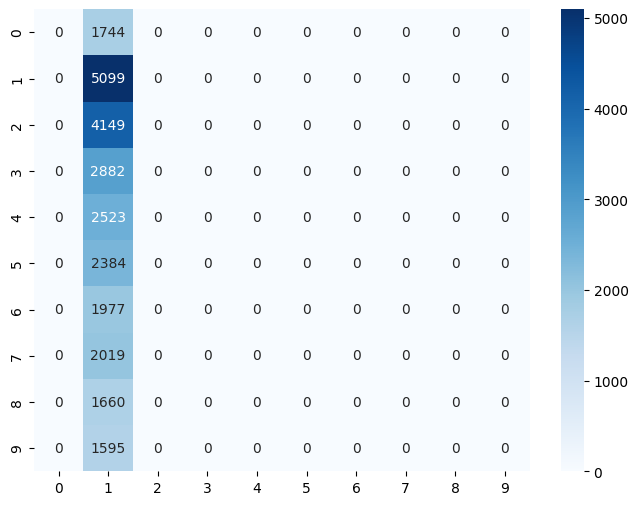

In [ ]:
mlp_acc = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='weighted')
mlp_recall = recall_score(y_test, y_pred, average='weighted')
mlp_f1 = f1_score(y_test, y_pred, average='weighted')
mlp_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
# Visualisasi dengan Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

print(f"\nAccuracy: {mlp_acc:.4f}\nPrecision: {mlp_precision:.4f}\nRecall: {mlp_recall:.4f}\nF1 Score: {mlp_f1:.4f}\nROC AUC Score: {mlp_roc_auc:.4f}")

Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


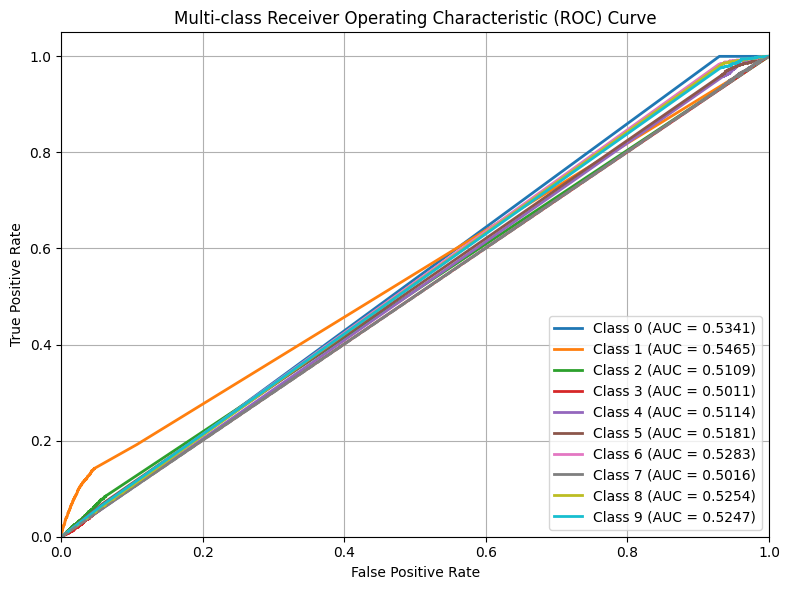

In [ ]:
# Cek apakah probabilitas sudah benar
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek apakah jumlah kelas sesuai
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi ke One-vs-Rest
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(8, 6))

# Plot ROC untuk tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Garis referensi diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling dan layout
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis MLP Model

## 📊 Evaluasi Model CNN Tensorflow

### 🔢 Confusion Matrix
Confusion matrix menunjukkan distribusi prediksi benar dan salah dari model klasifikasi terhadap setiap kelas (0–9). Baris = label sebenarnya, kolom = prediksi model.

### 📈 Metrik Evaluasi
Berikut hasil evaluasi model:

- **Accuracy**: 0.1959
  $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Seluruh Data}}$$

- **Precision**: 0.0384
  $$\text{Precision} = \frac{TP}{TP + FP}$$
  Precision mengukur seberapa akurat model ketika memprediksi sebuah kelas (menghindari false positives).

- **Recall**: 0.1959
  $$\text{Recall} = \frac{TP}{TP + FN}$$
  Recall mengukur seberapa baik model dalam menemukan semua contoh yang benar (menghindari false negatives).

- **F1 Score**: 0.0642
  $$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
  Kombinasi harmonis antara precision dan recall.

- **ROC AUC Score**: 0.5201
  ROC AUC menunjukkan performa model dalam membedakan kelas secara keseluruhan. Nilai dekat 1 berarti sangat baik.

### ✅ Kesimpulan
Model ini memiliki performa buruk dengan **akurasi sekitar 19.5%** dan **AUC Score sangat rendah** (0.5201) menandakan model kurang mampu membedakan antar kelas dengan baik. F1 score juga sangat rendah, menandakan ketidakseimbangan antara precision dan recall.
